## 第四章 Python 数据分析模块--Pandas


本部分主要介绍Python中的数据分析模块：Pandas的使用。数据分析需要一个“容器”装载。而大部分的结构化的数据都可以装载入一个类似于“表”的结构当中。而那些“非结构化”的数据也可以通过特征工程等装载入这个“容器”中。Python中的Pandas模块就是为了构建这种通用构建数据分析“容器”，并对数据进行清洗，合并，整理等的一系列函数的组合。学习Pandas包打开了数据科学处理数据的大门。

Pandas(panel data & Data Analysis)是基于Numpy的专门用于数据分析的库，处理大型的结构化表格数据尤其方便。pandas借鉴了R的数据结构，并支持numpy中定义的计算（比如矩阵运算），另外，底层用Cython和C做了很多速度上的优化。总之，Pandas是数据分析工作者使用Python时最常使用的库。


## 第一节 Pandas 简介

- Series
- DataFrame

Series:类似一维数组的对象。有两个重要属性：values 和 index

In [1]:
import pandas as pd

In [3]:
x = pd.Series([1,3,5,7,9]) #一维序列

In [4]:
x #与arrary不一样，左边有编号

0    1
1    3
2    5
3    7
4    9
dtype: int64

In [5]:
x.values #查看x的属性

array([1, 3, 5, 7, 9], dtype=int64)

In [6]:
x.index

RangeIndex(start=0, stop=5, step=1)

可以自己制定index，用于对数据点进行标记

In [7]:
x = pd.Series([1,3,5,7,9],index=['a','b','c','d','e'])

In [8]:
x

a    1
b    3
c    5
d    7
e    9
dtype: int64

跟numpy相比，Series 可以通过index的值进行索引。

In [9]:
x[['a','c','d']] #索引方法，在list提取value，也可以用字典操作。

a    1
c    5
d    7
dtype: int64

对Series进行操作，会保留index的值

In [10]:
x+2 #每个x加2

a     3
b     5
c     7
d     9
e    11
dtype: int64

In [11]:
x[x>3] 

c    5
d    7
e    9
dtype: int64

Series 很像字典，可以用字典的操作

In [12]:
x.keys(),x.index

(Index(['a', 'b', 'c', 'd', 'e'], dtype='object'),
 Index(['a', 'b', 'c', 'd', 'e'], dtype='object'))

In [13]:
'a' in x

True

In [ ]:
可通过字典，创建series

In [14]:
x={'a':100,'b':95,'c':98}

In [15]:
obj = pd.Series(x)

In [16]:
obj

a    100
b     95
c     98
dtype: int64

In [17]:
obj2 = pd.Series(x,index=['a','c','e']) #e对应的是NaN缺失

In [18]:
obj2

a    100.0
c     98.0
e      NaN
dtype: float64

两行的区别？

In [19]:
obj2.isna() #判断数据里是否有缺失数据

a    False
c    False
e     True
dtype: bool

In [20]:
obj2.isnull() #判断数据里是否有缺失数据

a    False
c    False
e     True
dtype: bool

In [21]:
pd.isna(obj2) #功能同上

a    False
c    False
e     True
dtype: bool

In [22]:
pd.isnull(obj2)

a    False
c    False
e     True
dtype: bool

In [23]:
obj,obj2

(a    100
 b     95
 c     98
 dtype: int64, a    100.0
 c     98.0
 e      NaN
 dtype: float64)

In [24]:
obj + obj2 ## 注意和numpy array 的不同，

a    200.0
b      NaN
c    196.0
e      NaN
dtype: float64

In [25]:
obj.index

Index(['a', 'b', 'c'], dtype='object')

In [26]:
obj.index = ['a1','c1','b1'] ## 索引可以改变

In [27]:
obj

a1    100
c1     95
b1     98
dtype: int64

## 小结：
- Series 的创建
- 索引
- 对齐

DataFrame：Pandas 最重要的数据结构，用途非常广泛

- DataFrame 的创建
- data view
- 索引

In [28]:
 dates = pd.date_range('20130101', periods=6)  #从20130101开始，产生6个数据

In [29]:
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [30]:
import numpy as np

In [31]:
df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list('ABCD')) #产生6行4列的矩阵，每行一个index,每列有个值

In [32]:
df #每学完一节课要试用，比如每只股票数据、雾霾数据跟日期有关的时间序列

,A,B,C,D
2013-01-01,-0.766505,0.295508,-0.985093,-0.144799
2013-01-02,0.595872,-0.682819,-0.218392,-1.218871
2013-01-03,-0.782761,-0.022971,-0.279637,0.900214
2013-01-04,0.661369,2.499147,-0.144649,-0.793741
2013-01-05,0.725073,0.439570,0.492945,0.237766
2013-01-06,-1.216221,-0.515616,-1.676924,-0.239947


In [35]:
df.values

array([[-0.7665051 ,  0.29550808, -0.98509335, -0.14479903],
       [ 0.59587218, -0.68281869, -0.21839212, -1.21887088],
       [-0.78276095, -0.02297111, -0.279637  ,  0.90021369],
       [ 0.66136887,  2.49914707, -0.14464938, -0.79374116],
       [ 0.72507333,  0.43957044,  0.49294466,  0.23776646],
       [-1.21622064, -0.5156161 , -1.67692407, -0.23994688]])

In [36]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

通过一系列等长的Serias来创建

In [37]:
data = {'state': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada', 'Nevada'],
        'year': [2000, 2001, 2002, 2001, 2002, 2003],
        'pop': [1.5, 1.7, 3.6, 2.4, 2.9, 3.2]}
frame = pd.DataFrame(data)

In [38]:
frame

,state,year,pop
0,Ohio,2000,1.5
1,Ohio,2001,1.7
2,Ohio,2002,3.6
3,Nevada,2001,2.4
4,Nevada,2002,2.9
5,Nevada,2003,3.2


In [44]:
df2 = pd.DataFrame({'A': 1.,
                    'B': pd.Timestamp('20130102'), 
                    'C': pd.Series(1, index=list(range(4)), dtype='float32'),
                    'D': np.array([3] * 4, dtype='int32'),
                    'E': pd.Categorical(["test", "train", "test", "train"]),
                    'F': 'foo'})
   #Timestamp时间戳

In [45]:
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


In [46]:
df2.dtypes #告诉每列的类型

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

In [47]:
df3 = pd.DataFrame({'A': 1.,
                    'B': pd.Timestamp('20130102'),
                    'C': pd.Series(1, index=list(range(4)), dtype='float32'),
                    'D': np.array([3] * 4, dtype='int32'),
                    'E': pd.Categorical(["test", "train", "test", "train"]),
                    'F': 'foo'}, columns=list('BADCFEG'))
    #[3]*4表示，长度4，每个值是3

In [48]:
df3

,B,A,D,C,F,E,G
0,2013-01-02,1.0,3,1.0,foo,test,NaN
1,2013-01-02,1.0,3,1.0,foo,train,NaN
2,2013-01-02,1.0,3,1.0,foo,test,NaN
3,2013-01-02,1.0,3,1.0,foo,train,NaN


**数据的显示**

In [52]:
df4 = pd.DataFrame(np.random.randn(7, 4), columns=list('ABCD'))

In [53]:
df4.head() #查看前5行

,A,B,C,D
0,1.481725,-1.721630,-0.898389,0.996484
1,-1.354718,0.866856,-2.339878,-0.373713
2,1.715256,-0.235645,0.483561,-0.180676
3,1.756214,-0.633973,-0.299376,0.768971
4,0.489779,1.119979,-0.642062,-0.863408


In [54]:
df4.tail() #查看默认后5行

,A,B,C,D
2,1.715256,-0.235645,0.483561,-0.180676
3,1.756214,-0.633973,-0.299376,0.768971
4,0.489779,1.119979,-0.642062,-0.863408
5,-0.019177,-0.366799,-0.527183,0.926869
6,-1.610400,0.084062,-1.011214,-0.923380


In [55]:
df4.index

RangeIndex(start=0, stop=7, step=1)

In [56]:
df4.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [57]:
df4.to_numpy() ## 转换成numpy, 注意和df4的区别？

array([[ 1.48172532, -1.7216303 , -0.89838876,  0.99648355],
       [-1.35471806,  0.86685559, -2.33987838, -0.37371263],
       [ 1.71525642, -0.23564468,  0.48356129, -0.18067569],
       [ 1.75621428, -0.63397255, -0.29937567,  0.7689714 ],
       [ 0.48977852,  1.11997857, -0.64206218, -0.86340781],
       [-0.01917746, -0.3667992 , -0.52718306,  0.92686889],
       [-1.61040019,  0.08406197, -1.01121382, -0.92337989]])

In [58]:
df4.describe() #做描述性统计

,A,B,C,D
count,7.000000,7.000000,7.000000,7.000000
mean,0.351240,-0.126736,-0.747792,0.050164
std,1.415816,0.953627,0.856735,0.836279
min,-1.610400,-1.721630,-2.339878,-0.923380
25%,-0.686948,-0.500386,-0.954801,-0.618560
50%,0.489779,-0.235645,-0.642062,-0.180676
75%,1.598491,0.475459,-0.413279,0.847920
max,1.756214,1.119979,0.483561,0.996484


In [59]:
df4.T #转置，行变列，列变行

,0,1,2,3,4,5,6
A,1.481725,-1.354718,1.715256,1.756214,0.489779,-0.019177,-1.610400
B,-1.721630,0.866856,-0.235645,-0.633973,1.119979,-0.366799,0.084062
C,-0.898389,-2.339878,0.483561,-0.299376,-0.642062,-0.527183,-1.011214
D,0.996484,-0.373713,-0.180676,0.768971,-0.863408,0.926869,-0.923380


In [60]:
df4.sort_index(axis=0,ascending=False)

,A,B,C,D
6,-1.610400,0.084062,-1.011214,-0.923380
5,-0.019177,-0.366799,-0.527183,0.926869
4,0.489779,1.119979,-0.642062,-0.863408
3,1.756214,-0.633973,-0.299376,0.768971
2,1.715256,-0.235645,0.483561,-0.180676
1,-1.354718,0.866856,-2.339878,-0.373713
0,1.481725,-1.721630,-0.898389,0.996484


In [61]:
df4.sort_index(axis=1,ascending=False) #axis=1表示行，axis=0表示列

,D,C,B,A
0,0.996484,-0.898389,-1.721630,1.481725
1,-0.373713,-2.339878,0.866856,-1.354718
2,-0.180676,0.483561,-0.235645,1.715256
3,0.768971,-0.299376,-0.633973,1.756214
4,-0.863408,-0.642062,1.119979,0.489779
5,0.926869,-0.527183,-0.366799,-0.019177
6,-0.923380,-1.011214,0.084062,-1.610400


In [62]:
df4

,A,B,C,D
0,1.481725,-1.721630,-0.898389,0.996484
1,-1.354718,0.866856,-2.339878,-0.373713
2,1.715256,-0.235645,0.483561,-0.180676
3,1.756214,-0.633973,-0.299376,0.768971
4,0.489779,1.119979,-0.642062,-0.863408
5,-0.019177,-0.366799,-0.527183,0.926869
6,-1.610400,0.084062,-1.011214,-0.923380


In [63]:
df4.sort_values(by='B')

,A,B,C,D
0,1.481725,-1.721630,-0.898389,0.996484
3,1.756214,-0.633973,-0.299376,0.768971
5,-0.019177,-0.366799,-0.527183,0.926869
2,1.715256,-0.235645,0.483561,-0.180676
6,-1.610400,0.084062,-1.011214,-0.923380
1,-1.354718,0.866856,-2.339878,-0.373713
4,0.489779,1.119979,-0.642062,-0.863408


In [64]:
df4.sort_values(by=['B','A'])

,A,B,C,D
0,1.481725,-1.721630,-0.898389,0.996484
3,1.756214,-0.633973,-0.299376,0.768971
5,-0.019177,-0.366799,-0.527183,0.926869
2,1.715256,-0.235645,0.483561,-0.180676
6,-1.610400,0.084062,-1.011214,-0.923380
1,-1.354718,0.866856,-2.339878,-0.373713
4,0.489779,1.119979,-0.642062,-0.863408


In [65]:
df1 = pd.DataFrame(np.random.randn(6, 4),
                     index=list('abcdef'),
                     columns=list('ABCD'))
#6行4列的数据，行为index，列为columns

In [66]:
df1

,A,B,C,D
a,0.817509,-0.394918,0.700470,1.022910
b,-2.198041,-1.471273,-0.650822,0.042547
c,0.037485,1.081071,0.744786,0.591234
d,0.727553,0.676299,-1.384965,0.010014
e,-0.439945,0.064100,1.179102,0.001328
f,1.613769,0.889908,1.073735,-0.024787


In [67]:
df1[1:3] #1、2两行

,A,B,C,D
b,-2.198041,-1.471273,-0.650822,0.042547
c,0.037485,1.081071,0.744786,0.591234


**数据的选择和筛选**

In [68]:
df1[:2,:3]

TypeError: '(slice(None, 2, None), slice(None, 3, None))' is an invalid key

In [109]:
df1.to_panel   # 按住tap键 自动弹出一些函数

<bound method DataFrame.to_panel of           A         B         C         D
a  0.817509 -0.394918  0.700470  1.022910
b -2.198041 -1.471273 -0.650822  0.042547
c  0.037485  1.081071  0.744786  0.591234
d  0.727553  0.676299 -1.384965  0.010014
e -0.439945  0.064100  1.179102  0.001328
f  1.613769  0.889908  1.073735 -0.024787>

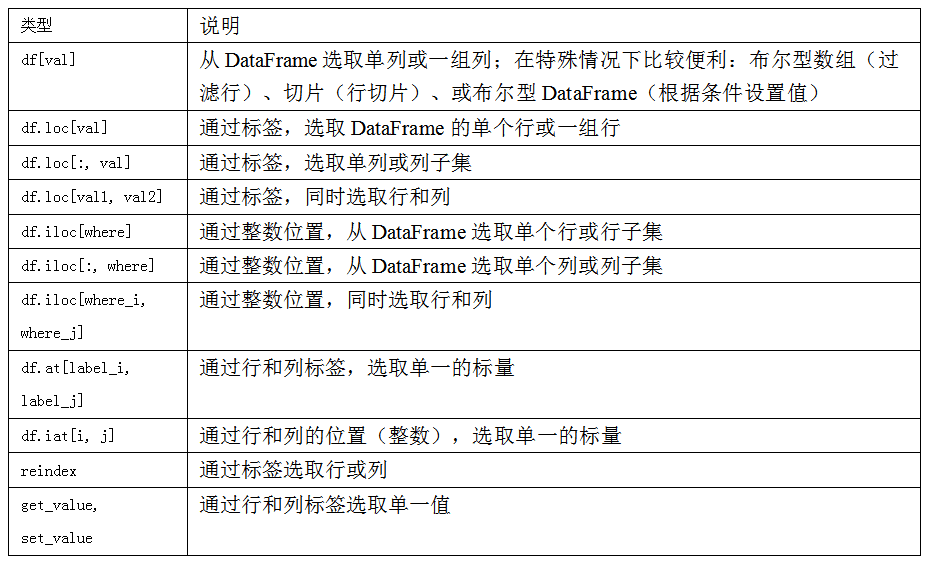

## 常用两种方法loc与iloc
### df.loc[["a"，"c"],["A", "C"]],取行和列的方法


In [79]:
![w11.jpg](attachment:C:\Users\Geoffrey\Desktop.jpg)

'[w11.jpg]' 不是内部或外部命令，也不是可运行的程序
或批处理文件。


In [81]:
![w11.jpg](C:\Users\Geoffrey\Desktop.jpg)

'[w11.jpg]' 不是内部或外部命令，也不是可运行的程序
或批处理文件。


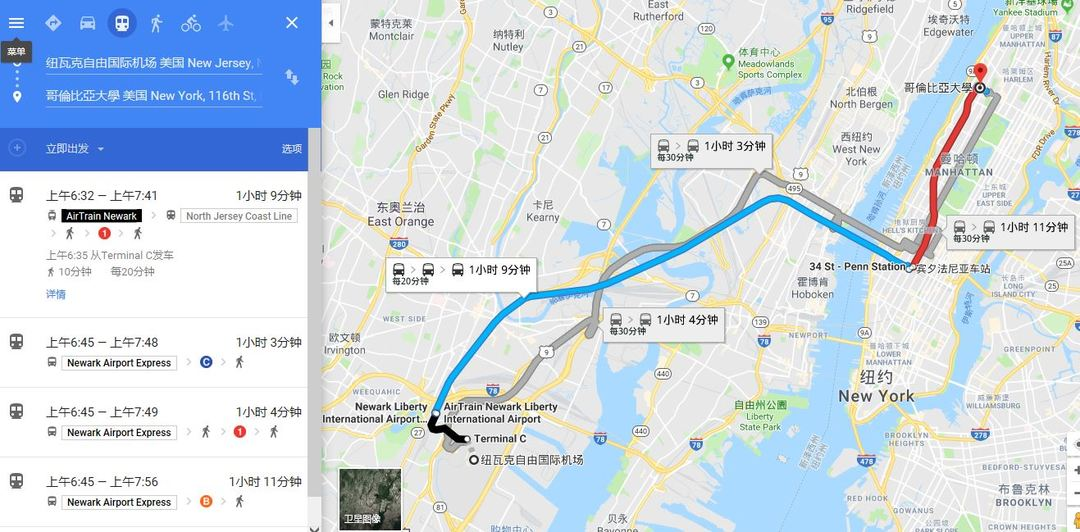



In [ ]:
##上图是放在桌面图片的路径 ![w11.jpg](attachment:w11.jpg)

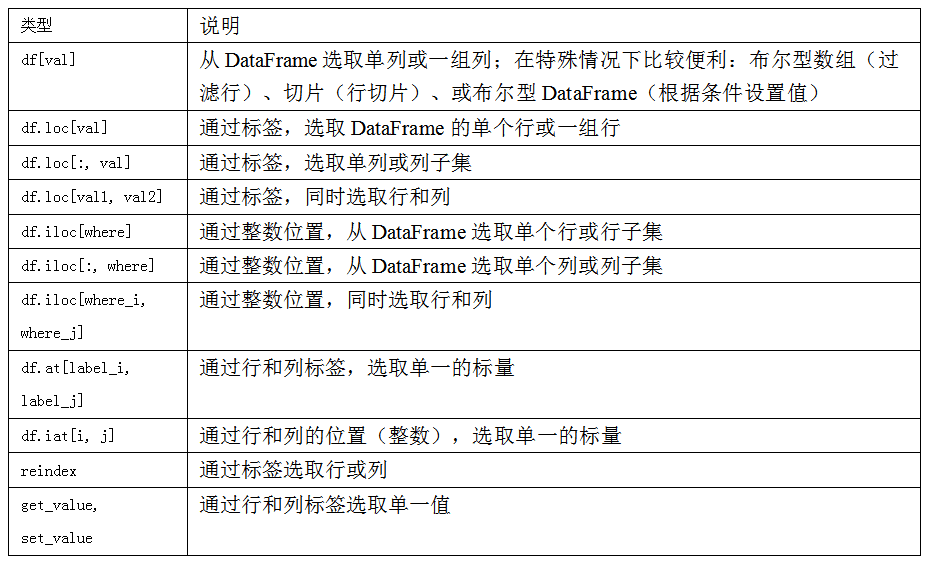
## 添加图片方法，可以将图片拖进markdown模式


In [69]:
df1.head()

,A,B,C,D
a,0.817509,-0.394918,0.700470,1.022910
b,-2.198041,-1.471273,-0.650822,0.042547
c,0.037485,1.081071,0.744786,0.591234
d,0.727553,0.676299,-1.384965,0.010014
e,-0.439945,0.064100,1.179102,0.001328


In [70]:
df1['A']

a    0.817509
b   -2.198041
c    0.037485
d    0.727553
e   -0.439945
f    1.613769
Name: A, dtype: float64

In [71]:
df1[['C','A']]

,C,A
a,0.700470,0.817509
b,-0.650822,-2.198041
c,0.744786,0.037485
d,-1.384965,0.727553
e,1.179102,-0.439945
f,1.073735,1.613769


In [72]:
df1.loc['a'] #.loc查看行

A    0.817509
B   -0.394918
C    0.700470
D    1.022910
Name: a, dtype: float64

In [73]:
df1.loc[['e','a']]

,A,B,C,D
e,-0.439945,0.064100,1.179102,0.001328
a,0.817509,-0.394918,0.700470,1.022910


In [74]:
df1.loc['a','A']

0.8175086552330987

In [82]:
df1.loc[:,'A']

a    0.817509
b   -2.198041
c    0.037485
d    0.727553
e   -0.439945
f    1.613769
Name: A, dtype: float64

In [83]:
df1.loc['a':'c']

,A,B,C,D
a,0.817509,-0.394918,0.700470,1.022910
b,-2.198041,-1.471273,-0.650822,0.042547
c,0.037485,1.081071,0.744786,0.591234


In [84]:
df2 = df1.reindex(['d','a','c','e','b'])

In [85]:
df2

,A,B,C,D
d,0.727553,0.676299,-1.384965,0.010014
a,0.817509,-0.394918,0.700470,1.022910
c,0.037485,1.081071,0.744786,0.591234
e,-0.439945,0.064100,1.179102,0.001328
b,-2.198041,-1.471273,-0.650822,0.042547


In [86]:
df2.loc['a':'e']

,A,B,C,D
a,0.817509,-0.394918,0.700470,1.022910
c,0.037485,1.081071,0.744786,0.591234
e,-0.439945,0.064100,1.179102,0.001328


In [87]:
df3 = df1.reindex(['d','a','c'])

In [88]:
df3

,A,B,C,D
d,0.727553,0.676299,-1.384965,0.010014
a,0.817509,-0.394918,0.700470,1.022910
c,0.037485,1.081071,0.744786,0.591234


In [89]:
df1.iloc[:2,1:3] ### 类似array的操作

,B,C
a,-0.394918,0.700470
b,-1.471273,-0.650822


In [90]:
df1

,A,B,C,D
a,0.817509,-0.394918,0.700470,1.022910
b,-2.198041,-1.471273,-0.650822,0.042547
c,0.037485,1.081071,0.744786,0.591234
d,0.727553,0.676299,-1.384965,0.010014
e,-0.439945,0.064100,1.179102,0.001328
f,1.613769,0.889908,1.073735,-0.024787


In [91]:
df5 = pd.DataFrame(np.random.randn(3,4)) #生成新数据

In [92]:
df5

,0,1,2,3
0,-0.189944,0.400288,-0.659185,0.933540
1,0.820948,0.044340,1.137781,1.279155
2,0.276297,-0.109180,-0.201296,0.066011


In [93]:
df5[0] #df5[0]表示表示编号为0列，[]两种用法，切片或列表

0   -0.189944
1    0.820948
2    0.276297
Name: 0, dtype: float64

In [94]:
df5.loc[0] # 第一行四个数据

0   -0.189944
1    0.400288
2   -0.659185
3    0.933540
Name: 0, dtype: float64

In [95]:
df5.loc[0:2] ##注意该结果和下个结果的区别，Loc看标号为0，1，2的三行

,0,1,2,3
0,-0.189944,0.400288,-0.659185,0.933540
1,0.820948,0.044340,1.137781,1.279155
2,0.276297,-0.109180,-0.201296,0.066011


In [96]:
df5.iloc[0:2] ##注意该结果和上个结果的区别，iloc只看数字，与numpy array一样

,0,1,2,3
0,-0.189944,0.400288,-0.659185,0.933540
1,0.820948,0.044340,1.137781,1.279155


In [97]:
ser = pd.Series(np.arange(3.),index=['a','b','c'])

In [98]:
ser

a    0.0
b    1.0
c    2.0
dtype: float64

## Boolean indexing布尔索引

In [99]:
df1

,A,B,C,D
a,0.817509,-0.394918,0.700470,1.022910
b,-2.198041,-1.471273,-0.650822,0.042547
c,0.037485,1.081071,0.744786,0.591234
d,0.727553,0.676299,-1.384965,0.010014
e,-0.439945,0.064100,1.179102,0.001328
f,1.613769,0.889908,1.073735,-0.024787


In [101]:
df1.A

a    0.817509
b   -2.198041
c    0.037485
d    0.727553
e   -0.439945
f    1.613769
Name: A, dtype: float64

In [104]:
df1.B >0 #用布尔值判断是否大于0

a    False
b    False
c     True
d     True
e     True
f     True
Name: B, dtype: bool

In [105]:
df1[df1.A>0]

,A,B,C,D
a,0.817509,-0.394918,0.700470,1.022910
c,0.037485,1.081071,0.744786,0.591234
d,0.727553,0.676299,-1.384965,0.010014
f,1.613769,0.889908,1.073735,-0.024787


In [106]:
df[df > 0] #选择大于0的，其他值为缺失

,A,B,C,D
2013-01-01,NaN,0.295508,NaN,NaN
2013-01-02,0.595872,NaN,NaN,NaN
2013-01-03,NaN,NaN,NaN,0.900214
2013-01-04,0.661369,2.499147,NaN,NaN
2013-01-05,0.725073,0.439570,0.492945,0.237766
2013-01-06,NaN,NaN,NaN,NaN


In [ ]:
df1[df1.A>0,'A']

In [ ]:
df1.loc[df1.A>0,'A']

In [ ]:
df1.loc['b',df1.loc['a']>0]

In [ ]:
df1.loc[df1.A>0,df1.loc['a']>0]

In [ ]:
df1.loc[df1.A>0]

## 添加列

In [118]:
df1

,A,B,C,D,E,F
a,0.817509,-0.394918,0.700470,1.022910,1,-0.427286
b,-2.198041,-1.471273,-0.650822,0.042547,1,-0.828970
c,0.037485,1.081071,0.744786,0.591234,1,-0.902702
d,0.727553,0.676299,-1.384965,0.010014,1,0.187240
e,-0.439945,0.064100,1.179102,0.001328,1,0.050680
f,1.613769,0.889908,1.073735,-0.024787,1,0.261289


In [119]:
df1['E'] = 1  #添加1列'E'

In [120]:
df1

,A,B,C,D,E,F
a,0.817509,-0.394918,0.700470,1.022910,1,-0.427286
b,-2.198041,-1.471273,-0.650822,0.042547,1,-0.828970
c,0.037485,1.081071,0.744786,0.591234,1,-0.902702
d,0.727553,0.676299,-1.384965,0.010014,1,0.187240
e,-0.439945,0.064100,1.179102,0.001328,1,0.050680
f,1.613769,0.889908,1.073735,-0.024787,1,0.261289


In [121]:
df1['F'] = np.random.randn(6)

In [122]:
df1

,A,B,C,D,E,F
a,0.817509,-0.394918,0.700470,1.022910,1,-1.450466
b,-2.198041,-1.471273,-0.650822,0.042547,1,0.374489
c,0.037485,1.081071,0.744786,0.591234,1,-1.447712
d,0.727553,0.676299,-1.384965,0.010014,1,-0.704422
e,-0.439945,0.064100,1.179102,0.001328,1,-2.334072
f,1.613769,0.889908,1.073735,-0.024787,1,0.900910


In [125]:
#df1['H'] = 2

In [126]:
#df1

,A,B,C,D,E,F,H
a,-0.817509,-0.394918,-0.700470,-1.022910,-1,-1.450466,2
b,-2.198041,-1.471273,-0.650822,-0.042547,-1,-0.374489,2
c,-0.037485,-1.081071,-0.744786,-0.591234,-1,-1.447712,2
d,-0.727553,-0.676299,-1.384965,-0.010014,-1,-0.704422,2
e,-0.439945,-0.064100,-1.179102,-0.001328,-1,-2.334072,2
f,-1.613769,-0.889908,-1.073735,-0.024787,-1,-0.900910,2


In [123]:
df1[df1>0] = -df1 把值转换成负的

In [124]:
df1

,A,B,C,D,E,F
a,-0.817509,-0.394918,-0.700470,-1.022910,-1,-1.450466
b,-2.198041,-1.471273,-0.650822,-0.042547,-1,-0.374489
c,-0.037485,-1.081071,-0.744786,-0.591234,-1,-1.447712
d,-0.727553,-0.676299,-1.384965,-0.010014,-1,-0.704422
e,-0.439945,-0.064100,-1.179102,-0.001328,-1,-2.334072
f,-1.613769,-0.889908,-1.073735,-0.024787,-1,-0.900910


**缺失数据**

In [127]:
df1.loc['b':'d','G'] = 1

In [128]:
df1

,A,B,C,D,E,F,H,G
a,-0.817509,-0.394918,-0.700470,-1.022910,-1,-1.450466,2,NaN
b,-2.198041,-1.471273,-0.650822,-0.042547,-1,-0.374489,2,1.0
c,-0.037485,-1.081071,-0.744786,-0.591234,-1,-1.447712,2,1.0
d,-0.727553,-0.676299,-1.384965,-0.010014,-1,-0.704422,2,1.0
e,-0.439945,-0.064100,-1.179102,-0.001328,-1,-2.334072,2,NaN
f,-1.613769,-0.889908,-1.073735,-0.024787,-1,-0.900910,2,NaN


In [129]:
df1.dropna(how='any') #扔掉数据的函数 dropna

,A,B,C,D,E,F,H,G
b,-2.198041,-1.471273,-0.650822,-0.042547,-1,-0.374489,2,1.0
c,-0.037485,-1.081071,-0.744786,-0.591234,-1,-1.447712,2,1.0
d,-0.727553,-0.676299,-1.384965,-0.010014,-1,-0.704422,2,1.0


In [130]:
?df1.dropna

In [131]:
df1.fillna(value =9999)

,A,B,C,D,E,F,H,G
a,-0.817509,-0.394918,-0.700470,-1.022910,-1,-1.450466,2,9999.0
b,-2.198041,-1.471273,-0.650822,-0.042547,-1,-0.374489,2,1.0
c,-0.037485,-1.081071,-0.744786,-0.591234,-1,-1.447712,2,1.0
d,-0.727553,-0.676299,-1.384965,-0.010014,-1,-0.704422,2,1.0
e,-0.439945,-0.064100,-1.179102,-0.001328,-1,-2.334072,2,9999.0
f,-1.613769,-0.889908,-1.073735,-0.024787,-1,-0.900910,2,9999.0


In [132]:
df1.fillna?

In [ ]:
{'A': 0, 'B': 1, 'C': 2, 'D': 3}

In [133]:
df1.apply(np.mean) #apply表示应用

A   -0.972384
B   -0.762928
C   -0.955647
D   -0.282137
E   -1.000000
F   -1.202012
H    2.000000
G    1.000000
dtype: float64

In [ ]:
df1.fillna(df1.apply(np.mean))

**一些运算**

In [134]:
df1.mean()

A   -0.972384
B   -0.762928
C   -0.955647
D   -0.282137
E   -1.000000
F   -1.202012
H    2.000000
G    1.000000
dtype: float64

pandas 一个重要的特征是**索引**，不同的DataFrame总可以用共同的索引，只是有些索引值**缺失**。
所以他们之间可以运算！

In [135]:
s1 = pd.Series([3, -5, 4, 5], index=['a', 'c', 'd', 'e'])

In [136]:
s2 = pd.Series([7, -2, 3, 1], index=['b', 'c', 'd', 'f'])

In [137]:
s1

a    3
c   -5
d    4
e    5
dtype: int64

In [138]:
s2

b    7
c   -2
d    3
f    1
dtype: int64

In [139]:
s1+s2

a    NaN
b    NaN
c   -7.0
d    7.0
e    NaN
f    NaN
dtype: float64

DataFrame 对齐操作同时发生在行和列上

In [140]:
df1 = pd.DataFrame(np.arange(9.).reshape((3, 3)), columns=list('bcd'),
                      index=['Ohio', 'Texas', 'Colorado'])
df2 = pd.DataFrame(np.arange(12.).reshape((4, 3)), columns=list('bde'),
                      index=['Utah', 'Ohio', 'Texas', 'Oregon'])

In [141]:
df1

,b,c,d
Ohio,0.0,1.0,2.0
Texas,3.0,4.0,5.0
Colorado,6.0,7.0,8.0


In [142]:
df2

,b,d,e
Utah,0.0,1.0,2.0
Ohio,3.0,4.0,5.0
Texas,6.0,7.0,8.0
Oregon,9.0,10.0,11.0


In [143]:
df1+df2

,b,c,d,e
Colorado,NaN,NaN,NaN,NaN
Ohio,3.0,NaN,6.0,NaN
Oregon,NaN,NaN,NaN,NaN
Texas,9.0,NaN,12.0,NaN
Utah,NaN,NaN,NaN,NaN


In [144]:
df1.add(df2,fill_value=0)

,b,c,d,e
Colorado,6.0,7.0,8.0,NaN
Ohio,3.0,1.0,6.0,5.0
Oregon,9.0,NaN,10.0,11.0
Texas,9.0,4.0,12.0,8.0
Utah,0.0,NaN,1.0,2.0


In [145]:
df1.add?

DataFrame 和 Series的运算

In [146]:
frame = pd.DataFrame(np.arange(12.).reshape((4, 3)),
                         columns=list('bde'),
                         index=['Utah', 'Ohio', 'Texas', 'Oregon'])

In [147]:
series = frame.mean()

In [148]:
frame

,b,d,e
Utah,0.0,1.0,2.0
Ohio,3.0,4.0,5.0
Texas,6.0,7.0,8.0
Oregon,9.0,10.0,11.0


In [149]:
series

b    4.5
d    5.5
e    6.5
dtype: float64

In [150]:
type(series)

pandas.core.series.Series

In [151]:
frame - series

,b,d,e
Utah,-4.5,-4.5,-4.5
Ohio,-1.5,-1.5,-1.5
Texas,1.5,1.5,1.5
Oregon,4.5,4.5,4.5


In [152]:
frame.sub(series)

,b,d,e
Utah,-4.5,-4.5,-4.5
Ohio,-1.5,-1.5,-1.5
Texas,1.5,1.5,1.5
Oregon,4.5,4.5,4.5


In [154]:
y = frame.b

In [155]:
y

Utah      0.0
Ohio      3.0
Texas     6.0
Oregon    9.0
Name: b, dtype: float64

In [ ]:
frame.sub(y,axis=0) #按行把列剪掉

几种常用的操作
- apply
- merge
- grouping

numpy 的真对元素的函数课作用在df上

In [ ]:
df1*2-8

In [ ]:
np.abs(df1*2-8)

In [ ]:
df1

In [ ]:
df1.apply(sum)

In [ ]:
df1.apply(sum,axis=1)

In [ ]:
df1.apply(sum,axis='columns')

In [ ]:
df1.apply(lambda x: x.max()-x.min(),axis=1)

In [ ]:
f = lambda x: x.max()-x.min()

In [ ]:
df1.apply(f,axis=0)

In [ ]:
format = lambda x: '%.2f' % x

In [ ]:
frame.applymap(format)

## Merge

In [ ]:
df = pd.DataFrame(np.random.randn(10, 4))

In [ ]:
df

In [ ]:
df[:2]

In [ ]:
df[7:]

In [ ]:
pd.concat([df[:2],df[7:]])

In [ ]:
left = pd.DataFrame({'name':['a','b','c'],'x1':[1,2,3]})

In [ ]:
right = pd.DataFrame({'name':['a','b','c'],'x2':[3,4,5]})

In [ ]:
left

In [ ]:
right

In [ ]:
pd.merge(left,right,on='name')

In [ ]:
df = pd.DataFrame(np.random.randn(8, 4), columns=['A', 'B', 'C', 'D'])

In [ ]:
s = df.iloc[3]

In [ ]:
df

In [ ]:
s

In [ ]:
df.append(s)

In [ ]:
df.append(s,ignore_index=True)

**Grouping**
- **Splitting** the data into groups based on some criteria
- **Applying** a function to each group independently
- **Combining** the results into a data structure

In [ ]:
df = pd.DataFrame({'height':[42,49,56,48,68],'weight':[157,177,171,150,162],'gender':['male','female','female','male','male']})

In [ ]:
df

In [ ]:
grouped = df.groupby('gender')

In [ ]:
grouped

In [ ]:
grouped.get_group('male')

In [ ]:
grouped.get_group('female')

In [ ]:
for name,group in grouped:
    print(name)
    print(group)

In [ ]:
for name,group in grouped:
    print(name)
    print(group.sum())
    
    

In [ ]:
grouped.apply(sum)

In [ ]:
grouped.aggregate([np.sum,np.mean])

**时间序列**

In [157]:
rng = pd.date_range('1/1/2012', periods=180, freq='S')

In [158]:
len(rng)

180

In [159]:
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)

In [160]:
ts[:10]

2012-01-01 00:00:00    447
2012-01-01 00:00:01     73
2012-01-01 00:00:02    162
2012-01-01 00:00:03    272
2012-01-01 00:00:04    436
2012-01-01 00:00:05    381
2012-01-01 00:00:06     84
2012-01-01 00:00:07    426
2012-01-01 00:00:08    149
2012-01-01 00:00:09    430
Freq: S, dtype: int32

In [161]:
ts.resample('1Min').sum()

2012-01-01 00:00:00    14688
2012-01-01 00:01:00    14250
2012-01-01 00:02:00    13380
Freq: T, dtype: int32

In [162]:
pd.date_range('3/6/2012 00:00', periods=5, freq='D')

DatetimeIndex(['2012-03-06', '2012-03-07', '2012-03-08', '2012-03-09',
               '2012-03-10'],
              dtype='datetime64[ns]', freq='D')

**plotting**

In [163]:
ts = pd.Series(np.random.randn(1000),
               index=pd.date_range('1/1/2000', periods=1000))

In [164]:
ts[:10]

2000-01-01    1.375112
2000-01-02   -0.436297
2000-01-03   -0.025255
2000-01-04    0.003339
2000-01-05    0.991019
2000-01-06    0.048905
2000-01-07    0.239203
2000-01-08   -0.954312
2000-01-09   -1.819352
2000-01-10    1.527203
Freq: D, dtype: float64

In [165]:
ts = ts.cumsum() ##累加和

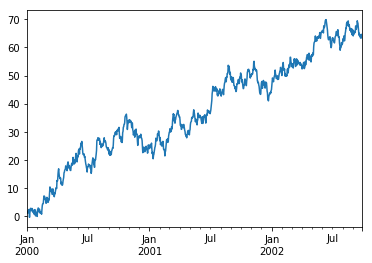

In [166]:
%matplotlib inline
ts.plot()

In [168]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index,
                     columns=['A', 'B', 'C', 'D']) #

In [169]:
df = df.cumsum()

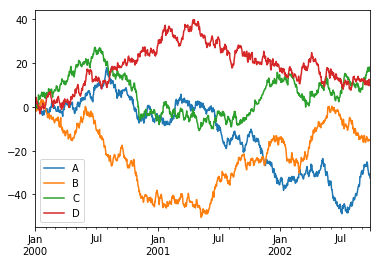

In [170]:
df.plot()

数据的存储和读取
- df.to_csv()
- pd.read_csv()
- df.to_excel()
- pd.read_excel()
()里面是名

In [1]:
import tushare as ts  ##tus


In [2]:
sk = ts.get_hist_data('600848')

In [3]:
sk.shape

(536, 13)

In [4]:
sk.head()

,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20
date,,,,,,,,,,,,,
2019-09-25,27.28,27.29,26.60,26.53,67050.33,-0.73,-2.67,27.532,27.563,27.482,82462.86,87380.27,100317.19
2019-09-24,27.67,27.80,27.33,27.31,66308.66,-0.31,-1.12,27.764,27.667,27.512,89855.82,88897.67,102737.68
2019-09-23,28.00,28.19,27.64,27.50,76006.28,-0.65,-2.30,27.814,27.712,27.489,98391.88,92873.16,105143.73
2019-09-20,27.96,28.88,28.29,27.67,125565.73,0.49,1.76,27.820,27.680,27.496,100271.05,93751.82,109555.71
2019-09-19,27.83,28.02,27.80,27.47,77383.31,0.04,0.14,27.672,27.593,27.493,94281.90,96297.90,113326.60


In [5]:
sk[['close','ma5','ma10','ma20']].plot()

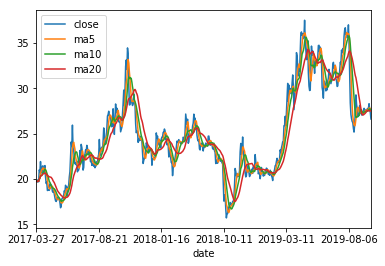

In [6]:
sk[['close','ma5','ma10','ma20']].sort_index().plot()

In [7]:
sk.to_csv('sk600848.csv')

In [8]:
sh = ts.get_hist_data('sh')


In [9]:
sh.shape

(613, 13)

In [10]:
sh.head()

,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20
date,,,,,,,,,,,,,
2019-09-25,2977.67,2977.67,2955.43,2955.43,1685431.38,-29.91,-1.00,2984.716,2995.816,2973.608,1690842.52,1885491.01,2032050.65
2019-09-24,2979.48,3002.90,2985.34,2973.76,1639027.62,8.26,0.28,2990.762,3002.393,2970.946,1689849.65,1956960.82,2051849.98
2019-09-23,2998.40,2998.40,2977.08,2960.83,1681394.50,-29.37,-0.98,2989.318,3006.333,2964.857,1808720.22,2036435.81,2054846.28
2019-09-20,3004.81,3011.34,3006.45,2996.19,1821453.00,7.17,0.24,3000.052,3008.585,2960.875,1916199.22,2085122.39,2050354.97
2019-09-19,2992.92,2999.28,2999.28,2975.40,1626906.12,13.62,0.46,3005.010,3006.526,2954.724,1945846.02,2208415.79,2033885.42


In [11]:
sh.tail()

,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20
date,,,,,,,,,,,,,
2017-03-31,3206.25,3226.25,3222.51,3205.54,1964429.25,12.27,0.38,3238.794,3238.794,3238.794,2046493.32,2046493.32,2046493.32
2017-03-30,3235.14,3240.02,3210.24,3195.85,2471354.75,-31.07,-0.96,3242.865,3242.865,3242.865,2067009.34,2067009.34,2067009.34
2017-03-29,3252.87,3262.10,3241.31,3233.28,2161055.75,-11.64,-0.36,3253.740,3253.740,3253.740,1932227.54,1932227.54,1932227.54
2017-03-28,3265.63,3265.63,3252.95,3246.09,1617100.12,-14.01,-0.43,3259.955,3259.955,3259.955,1817813.44,1817813.44,1817813.44
2017-03-27,3268.92,3283.24,3266.96,3262.12,2018526.75,-2.49,-0.08,3266.960,3266.960,3266.960,2018526.75,2018526.75,2018526.75


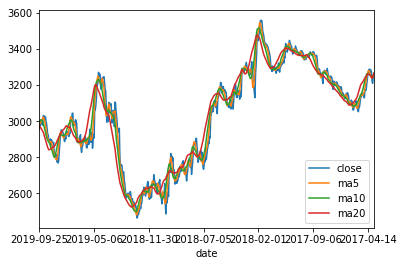

In [12]:
sh[['close','ma5','ma10','ma20']].plot()

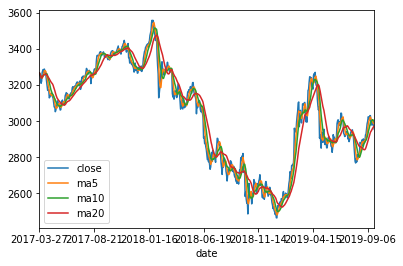

In [13]:
sh[['close','ma5','ma10','ma20']].sort_index().plot()

**作业**
- 研究一些股票，找出相关系数大于0.8的股票,若没有，计算最大的相关系数
- 假设初始资金100万，设计投资策略，并比较策略和大盘的收益
- 画出资金每日增长／减少曲线[一条是投资策略的，一条是按大盘走势的]
- 一些提示

In [ ]:
info = ts.get_stock_basics()

In [ ]:
info.head()

In [ ]:
x = ts.get_hist_data('688018')

In [ ]:
x.head()

In [ ]:
y = ts.get_hist_data('600122')

In [ ]:
y.head()

In [ ]:
x.shape,y.shape

In [ ]:
x.close.corr(y.close)